# AI Course Homework: Machine Learning Fundamentals

This notebook provides hands-on experience with key machine learning concepts: **Naive Bayes**, **Decision Trees**, **Regression (Polynomial and Logistic)**, **Neural Networks** and **CNN**. You'll implement algorithms from scratch and apply them to datasets to deepen your understanding. The notebook is divided into five sections, each with a theoretical overview and practical exercises.

**Instructions:**
- Complete all sections in the code and answer the questions.
- Submit the notebook with all code cells executed and outputs visible.
- Use `numpy` for basic operations, but implement core algorithm logic yourself where indicated



## Sections
1. **Naive Bayes**
2. **Decision Trees**
3. **Regression (Polynomial and Logistic)**
4. **Neural Networks (Perceptron and Multi-Layer Perceptron)**
5. **CNN From Scratch!**

In [2]:
Name="Nima Mollaei"
Student_Number="402106553"

## Section 1: Naive Bayes

### Theoretical Overview
**Naive Bayes** is a probabilistic classifier that assumes features are conditionally independent given the class label, using Bayes' theorem:

$$ P(Y | F_1, ..., F_n) \propto P(Y) \prod_{i} P(F_i | Y) $$

Here, you'll implement Naive Bayes for spam classification.

### Practical Exercise: Implementing Naive Bayes
**Dataset:** Emails labeled 'spam' or 'ham' with binary features 'free' and 'money'.

| free | money | label |
|------|-------|-------|
| 1    | 0     | spam  |
| 0    | 1     | spam  |
| 0    | 0     | ham   |
| 1    | 1     | spam  |
| 0    | 0     | ham   |

**Tasks:**
1. Calculate prior probabilities $ P(\text{spam}) $ and $ P(\text{ham}) $.
2. Calculate conditional probabilities with Laplace smoothing ($ k=1 $): $ P(\text{free}=1 | \text{spam}) $, $ P(\text{free}=1 | \text{ham}) $, $ P(\text{money}=1 | \text{spam}) $, $ P(\text{money}=1 | \text{ham}) $.
3. Predict the label for a new email: $ \text{free}=1 $, $ \text{money}=0 $.

**Questions:**
- Why is Laplace smoothing important?
  - **Answer:** چون اگر در داده تست حالتی ببینیم که قبلا در داده یادگیری نبوده مدل به کلی جواب نادرست میدهد یعنی احتمال آن حالت صفر مطلق درنظر گرفته شده که با این روش آن را به کمی بیشتر از صفر تغییر میدهیم.
- How does feature independence affect performance?
  - **Answer:** فرض استقلال میان ویژگی ها میتواند محاسبات را بسیار آسان کند اما فقط وقتی این کار را میکنیم که وابستگی زیادی بین ویژگی ها نباشد در این صورت دقت مدل کاهش ناچیزی دارد.
  

In [3]:
import numpy as np

# Toy dataset
data = np.array([
    [1, 0, 'spam'],
    [0, 1, 'spam'],
    [0, 0, 'ham'],
    [1, 1, 'spam'],
    [0, 0, 'ham']
])
X = data[:, :-1].astype(int)
y = data[:, -1]

# Calculate prior probabilities
total = len(y)
p_spam = np.sum(y == 'spam') / total
p_ham = np.sum(y == 'ham') / total
print(f'P(spam) = {p_spam}, P(ham) = {p_ham}')

# Calculate conditional probabilities with Laplace smoothing
def conditional_prob(feature_idx, value, label, X, y, k=1):
    label_indices = np.where(y == label)[0]
    feature_values = X[label_indices, feature_idx]
    count = np.sum(feature_values == value)
    # Laplace smoothing denominator: total label samples + number of possible feature values (2: 0 and 1)
    return (count + k) / (len(label_indices) + 2 * k)

p_free1_spam = conditional_prob(0, 1, 'spam', X, y)
p_free1_ham = conditional_prob(0, 1, 'ham', X, y)
p_money1_spam = conditional_prob(1, 1, 'spam', X, y)
p_money1_ham = conditional_prob(1, 1, 'ham', X, y)

print(f'P(free=1|spam) = {p_free1_spam:.4f}, P(free=1|ham) = {p_free1_ham:.4f}')
print(f'P(money=1|spam) = {p_money1_spam:.4f}, P(money=1|ham) = {p_money1_ham:.4f}')

# Predict for new email
new_email = np.array([1, 0])

# For spam
p_spam_given_email = p_spam
for i in range(len(new_email)):
    p_spam_given_email *= conditional_prob(i, new_email[i], 'spam', X, y)

# For ham
p_ham_given_email = p_ham
for i in range(len(new_email)):
    p_ham_given_email *= conditional_prob(i, new_email[i], 'ham', X, y)

# Normalize
norm_factor = p_spam_given_email + p_ham_given_email
p_spam_norm = p_spam_given_email / norm_factor
p_ham_norm = p_ham_given_email / norm_factor

prediction = 'spam' if p_spam_norm > p_ham_norm else 'ham'

print(f'P(spam|free=1, money=0) = {p_spam_norm:.4f}, P(ham|free=1, money=0) = {p_ham_norm:.4f}')
print(f'Prediction: {prediction}')


P(spam) = 0.6, P(ham) = 0.4
P(free=1|spam) = 0.6000, P(free=1|ham) = 0.2500
P(money=1|spam) = 0.6000, P(money=1|ham) = 0.2500
P(spam|free=1, money=0) = 0.6575, P(ham|free=1, money=0) = 0.3425
Prediction: spam


## Section 2: Decision Trees

### Theoretical Overview
**Decision Trees** split data based on features to maximize **information gain**:

$$ IG(X_i) = H(Y) - H(Y | X_i) $$
$$ H(Y) = -\sum_c P(Y=c) \log_2 P(Y=c) $$

where $ H $ is entropy. Overfitting is a risk, addressed by pruning.

### Practical Exercise: Implementing a Decision Tree
**Dataset:** Features $ \text{age} $ (young/old), $ \text{income} $ (low/high), $ \text{student} $ (yes/no), and label $ \text{buys\_product} $ (yes/no).

| age   | income | student | buys_product |
|-------|--------|---------|--------------|
| young | high   | no      | no           |
| young | high   | yes     | yes          |
| old   | high   | no      | yes          |
| old   | low    | yes     | yes          |
| young | low    | no      | no           |
| old   | low    | no      | no           |
| young | low    | yes     | yes          |
| old   | high   | yes     | yes          |

**Tasks:**
1. Implement entropy calculation.
2. Implement information gain calculation.
3. Build a tree with a max depth of 3, splitting on the highest information gain.
4. Apply pruning: stop splitting if gain < 0.1.
5. Predict for $ \text{age}=\text{young} $, $ \text{income}=\text{low} $, $ \text{student}=\text{no} $.

**Questions:**
- Why was a feature chosen for the root?
  - **Answer:** در هر مرحله سعی بر آن است تا ویژگی انتخاب شود که داده ها را به شدید ترین شکل ممکن تفکیک کند یا به عبارتی اطلاعات بیشتری درباره دسته بندی در اختیار ما بگذارد.
- How does pruning prevent overfitting?
  - **Answer:** این کار جلوی ساخته شدن درخت های پیچیده را میگیرد، اگر اطلاعاتی که یک ویژگی به ما میدهد از حدی کمتر شود آن را نادیده میگیریم.

In [4]:
import numpy as np
from collections import Counter

# Toy dataset
data = np.array([
    ['young', 'high', 'no', 'no'],
    ['young', 'high', 'yes', 'yes'],
    ['old', 'high', 'no', 'yes'],
    ['old', 'low', 'yes', 'yes'],
    ['young', 'low', 'no', 'no'],
    ['old', 'low', 'no', 'no'],
    ['young', 'low', 'yes', 'yes'],
    ['old', 'high', 'yes', 'yes']
])
X = data[:, :-1]
y = data[:, -1]

# Entropy calculation
def entropy(labels):
    label_counts = Counter(labels)
    total = len(labels)
    ent = 0.0
    for count in label_counts.values():
        prob = count / total
        ent -= prob * np.log2(prob)
    return ent

H_y = entropy(y)
print(f'Entropy of buys_product: {H_y:.4f}')

# Information gain calculation
def info_gain(feature_idx, X, y):
    values = np.unique(X[:, feature_idx])
    total_entropy = entropy(y)
    subset_entropy = 0.0
    for val in values:
        subset_y = y[X[:, feature_idx] == val]
        weight = len(subset_y) / len(y)
        subset_entropy += weight * entropy(subset_y)
    gain = total_entropy - subset_entropy
    return gain

# Decision Tree Node
class TreeNode:
    def __init__(self, feature=None, value=None, left=None, right=None, label=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.label = label

# Build Decision Tree
def build_tree(X, y, depth=0, max_depth=3, min_gain=0.1):
    # If all labels are the same, return a leaf
    if len(set(y)) == 1:
        return TreeNode(label=y[0])
    
    # If max depth is reached or no features to split
    if depth >= max_depth or X.shape[1] == 0:
        majority_label = Counter(y).most_common(1)[0][0]
        return TreeNode(label=majority_label)
    
    # Find best feature to split on
    gains = [info_gain(i, X, y) for i in range(X.shape[1])]
    best_feature = np.argmax(gains)
    best_gain = gains[best_feature]
    
    if best_gain < min_gain:
        majority_label = Counter(y).most_common(1)[0][0]
        return TreeNode(label=majority_label)
    
    # Split on best feature
    values = np.unique(X[:, best_feature])
    if len(values) != 2:
        raise ValueError("Only binary splits supported in this simple tree")
    
    left_val, right_val = values
    
    left_idx = X[:, best_feature] == left_val
    right_idx = X[:, best_feature] == right_val
    
    left_subtree = build_tree(X[left_idx], y[left_idx], depth + 1, max_depth, min_gain)
    right_subtree = build_tree(X[right_idx], y[right_idx], depth + 1, max_depth, min_gain)
    
    return TreeNode(feature=best_feature, value=left_val, left=left_subtree, right=right_subtree)

# Predict
def predict(tree, x):
    while tree.label is None:
        if x[tree.feature] == tree.value:
            tree = tree.left
        else:
            tree = tree.right
    return tree.label

# Build and predict
tree = build_tree(X, y)
new_instance = ['young', 'low', 'no']
prediction = predict(tree, new_instance)
print(f'Prediction for {new_instance}: {prediction}')


Entropy of buys_product: 0.9544
Prediction for ['young', 'low', 'no']: no


## Section 3: Regression (Polynomial and Logistic)

### Theoretical Overview
**Polynomial Regression** fits continuous outcomes:

$$ y(x, \mathbf{w}) = \sum_{j=0}^{M} w_j x^j $$
- **Error:** $ E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2 $
- **Regularization:** Adds $ \frac{\lambda}{2} ||\mathbf{w}||^2 $ to prevent overfitting.

**Logistic Regression** predicts class probabilities:

$$ P(Y=1 | X) = \frac{1}{1 + \exp(-(\mathbf{w}^T X + b))} $$
- **Loss:** Cross-entropy.

### Practical Exercise: Polynomial and Logistic Regression
**Tasks:**
1. Fit polynomial regression (degrees 1, 3, 9) to a synthetic dataset and plot.
2. Apply Ridge regularization to degree 9 ($ \lambda = 0.01 $) and plot.
3. Implement logistic regression with gradient descent on the Decision Tree dataset.
4. Compare polynomial and logistic regression on the classification task.

**Questions:**
- Why does degree 9 overfit?
  - **Answer:** چون با افزایش پیچیدگی مدل ما حتی نویز ها را نیز خیلی دقیق یاد میگیرد. اما برای داده هایی که در دسته داده های یادگیری نبوده اند رفتار خوبی ندارد
- How does regularization help?
  - **Answer:** when we have over fitting our weights get very small negative or large positive numbers to make a big difference in a smal change to fit the train data and when we put a penalty for the norm of weights actually we are avoiding overfitting.
  

<>:113: SyntaxWarning: invalid escape sequence '\l'
<>:113: SyntaxWarning: invalid escape sequence '\l'
C:\Users\RSKALA\AppData\Local\Temp\ipykernel_25244\1749859818.py:113: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(X_test, y_test_pred_reg, 'g-', label='Deg 9 Reg ($\lambda=0.01$)')


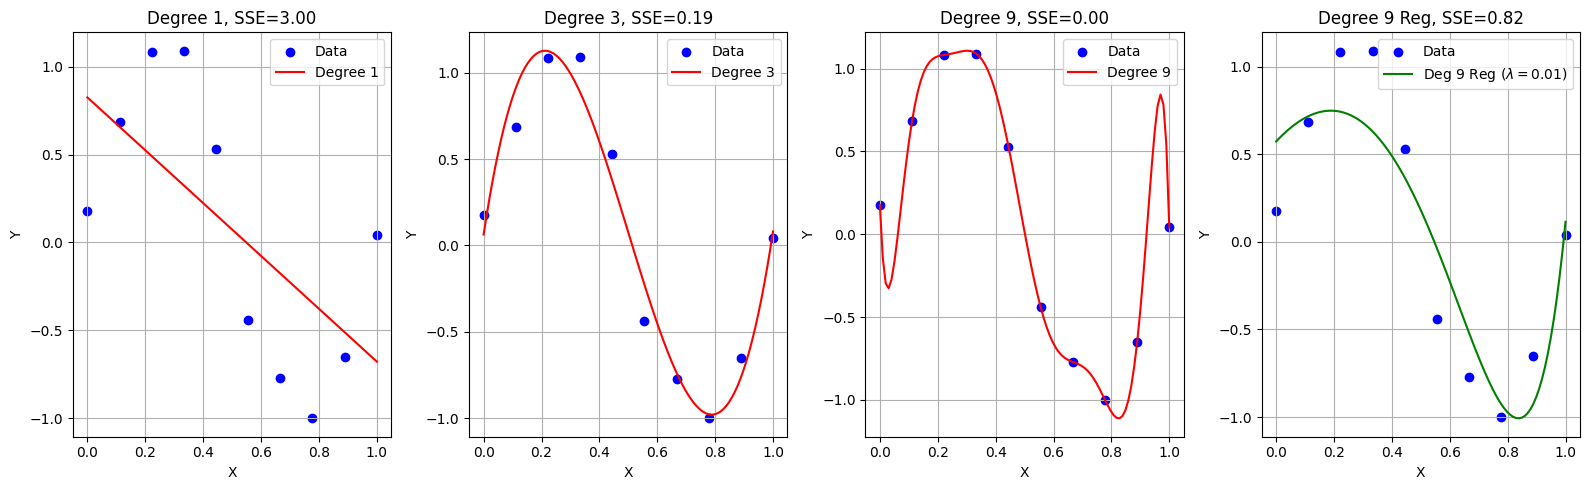


Learned Logistic Regression Weights: [-3.5634481   6.98961746 -7.14933884 14.85079806]
Logistic Regression prediction for young, low, no (numerical [0 1 0]): 0
Predicted label: no

--- Comparison of Models for Classification ---
Polynomial Regression is fundamentally designed for **regression tasks** (predicting continuous values). While its output could be thresholded for binary classification, it doesn't inherently model probabilities or handle classification boundaries optimally.

Logistic Regression is a **linear model specifically designed for classification**, particularly binary classification. It models the probability of a binary outcome using a sigmoid function, making it suitable for tasks like predicting 'yes' or 'no'. It learns a linear decision boundary between classes.

For the 'buys_product' dataset (which is categorical and small):
- **Logistic Regression** is directly applicable as it's a classification problem. It learns a linear boundary in the feature space.
- **D

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Polynomial Regression ---
np.random.seed(0)
X_poly = np.linspace(0, 1, 10).reshape(-1, 1)
y_poly = np.sin(2 * np.pi * X_poly).ravel() + np.random.normal(0, 0.1, 10)

def polynomial_features(X, degree):
    """
    Transforms input X into polynomial features up to a given degree.
    Includes a bias (constant) term as the first column (X^0).
    """
    X_poly_features = np.ones((X.shape[0], 1)) # X^0 term (bias)
    for d in range(1, degree + 1):
        X_poly_features = np.hstack((X_poly_features, X ** d))
    return X_poly_features

def fit_polynomial(X_poly_features, y, lambda_reg=0):
    """
    Fits polynomial regression using least squares, with optional Ridge regularization.
    
    Args:
        X_poly_features (np.array): The polynomial feature matrix (already includes bias).
        y (np.array): The target variable.
        lambda_reg (float): The regularization parameter (lambda). If 0, no regularization.
        
    Returns:
        np.array: The learned weights (coefficients).
    """
    num_features = X_poly_features.shape[1]
    
    # If lambda_reg is 0, perform standard least squares
    if lambda_reg == 0:
        # Using np.linalg.lstsq for numerical stability
        weights = np.linalg.lstsq(X_poly_features, y, rcond=None)[0]
    else:
        # Ridge regularization: w = (Phi.T @ Phi + lambda_reg * I)^-1 @ Phi.T @ y
        identity_matrix = np.eye(num_features)
        
        # Calculate (Phi.T @ Phi + lambda_reg * I)
        A = X_poly_features.T @ X_poly_features + lambda_reg * identity_matrix
        
        # Calculate Phi.T @ y
        b = X_poly_features.T @ y
        
        # Solve for weights w
        weights = np.linalg.solve(A, b)
    return weights

def predict(X_poly_features, w):
    """
    Generates predictions from polynomial features and learned weights.
    
    Args:
        X_poly_features (np.array): The polynomial feature matrix.
        w (np.array): The learned weights.
        
    Returns:
        np.array: Predicted y values.
    """
    return X_poly_features @ w

def sse(y_true, y_pred):
    """
    Calculates the Sum of Squared Errors (SSE).
    
    Args:
        y_true (np.array): True target values.
        y_pred (np.array): Predicted target values.
        
    Returns:
        float: The sum of squared errors.
    """
    return np.sum((y_true - y_pred)**2)

# Polynomial fits
degrees = [1, 3, 9]
plt.figure(figsize=(16, 5)) # Adjusted figure size for 4 subplots
X_test = np.linspace(0, 1, 100).reshape(-1, 1)

for i, deg in enumerate(degrees, 1):
    X_poly_train = polynomial_features(X_poly, deg)
    w = fit_polynomial(X_poly_train, y_poly)
    
    y_pred_train = predict(X_poly_train, w) # Predictions on training data for SSE
    X_test_poly = polynomial_features(X_test, deg)
    y_test_pred = predict(X_test_poly, w)
    
    error = sse(y_poly, y_pred_train)
    
    plt.subplot(1, 4, i)
    plt.scatter(X_poly, y_poly, color='blue', label='Data')
    plt.plot(X_test, y_test_pred, 'r-', label=f'Degree {deg}')
    plt.title(f'Degree {deg}, SSE={error:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

# Regularized degree 9
X_poly_9_train = polynomial_features(X_poly, 9)
w_reg = fit_polynomial(X_poly_9_train, y_poly, lambda_reg=0.01)

y_pred_reg_train = predict(X_poly_9_train, w_reg) # Predictions on training data for SSE
X_test_poly_9 = polynomial_features(X_test, 9)
y_test_pred_reg = predict(X_test_poly_9, w_reg)

error_reg = sse(y_poly, y_pred_reg_train)

plt.subplot(1, 4, 4)
plt.scatter(X_poly, y_poly, color='blue', label='Data')
plt.plot(X_test, y_test_pred_reg, 'g-', label='Deg 9 Reg ($\lambda=0.01$)')
plt.title(f'Degree 9 Reg, SSE={error_reg:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig('regression_plots.png') # This line would save the plot to a file
plt.show() # Display the plot

# --- Logistic Regression ---
# Data for logistic regression (from Decision Tree section, already numerical)
# Features: age (young=0, old=1), income (low=0, high=1), student (no=0, yes=1)
# Label: buys_product (no=0, yes=1)
X_log = np.array([
    [0, 0, 0],   # young, high, no
    [0, 0, 1],   # young, high, yes
    [1, 0, 0],   # old, high, no
    [1, 1, 1],   # old, low, yes
    [0, 1, 0],   # young, low, no
    [1, 1, 0],   # old, low, no
    [0, 1, 1],   # young, low, yes
    [1, 0, 1]    # old, high, yes
])
y_log = np.array([0, 1, 1, 1, 0, 0, 1, 1])

def sigmoid(z):
    """The sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.1, epochs=1000):
    """
    Trains a logistic regression model using gradient descent.
    
    Args:
        X (np.array): Feature matrix (N samples x D features). Does NOT include bias initially.
        y (np.array): True labels (N samples).
        lr (float): Learning rate for gradient descent.
        epochs (int): Number of training iterations.
        
    Returns:
        np.array: Learned weights (coefficients), including the bias term at index 0.
    """
    # Add a bias (intercept) term to X
    # The bias term is a column of ones.
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    num_samples, num_features_with_bias = X_bias.shape
    weights = np.zeros(num_features_with_bias) # Initialize weights to zeros
    
    for epoch in range(epochs):
        # Calculate linear combination (z)
        z = X_bias @ weights
        
        # Calculate predicted probabilities (h)
        predictions = sigmoid(z)
        
        # Calculate the error (difference between predicted and true labels)
        error = predictions - y
        
        # Calculate the gradient
        # Gradient for logistic regression cross-entropy loss is X_bias.T @ error / N
        gradient = (X_bias.T @ error) / num_samples
        
        # Update weights
        weights -= lr * gradient
        
        # Optional: Print loss periodically (can be added here for debugging)
        # if epoch % (epochs // 10) == 0:
        #     loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
        #     print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")
            
    return weights

w_log = logistic_regression(X_log, y_log, lr=0.1, epochs=20000) # Increased epochs for better convergence
print(f'\nLearned Logistic Regression Weights: {w_log}')

# Predict for new email: young, low, no -> X_log: [0, 1, 0]
new_instance_log = np.array([0, 1, 0])
# Add bias term to the new instance for prediction
new_instance_log_with_bias = np.insert(new_instance_log, 0, 1) 

prob = sigmoid(np.dot(new_instance_log_with_bias, w_log))
prediction_log = 1 if prob > 0.5 else 0
print(f'Logistic Regression prediction for young, low, no (numerical {new_instance_log}): {prediction_log}')

# Convert prediction back to original label if needed for user clarity
# Mapping: 0 -> no, 1 -> yes
reverse_buys_product_map = {0: 'no', 1: 'yes'}
print(f'Predicted label: {reverse_buys_product_map[prediction_log]}')


# --- Comparison of Models for Classification ---
print("\n--- Comparison of Models for Classification ---")
print("Polynomial Regression is fundamentally designed for **regression tasks** (predicting continuous values). While its output could be thresholded for binary classification, it doesn't inherently model probabilities or handle classification boundaries optimally.")
print("\nLogistic Regression is a **linear model specifically designed for classification**, particularly binary classification. It models the probability of a binary outcome using a sigmoid function, making it suitable for tasks like predicting 'yes' or 'no'. It learns a linear decision boundary between classes.")
print("\nFor the 'buys_product' dataset (which is categorical and small):")
print("- **Logistic Regression** is directly applicable as it's a classification problem. It learns a linear boundary in the feature space.")
print("- **Decision Trees** (as implemented in the previous section) are well-suited for tabular data with categorical features. They partition the feature space with axis-aligned splits, which can capture non-linear relationships naturally without explicit feature engineering like polynomial terms.")
print("\nIn general, for classification tasks, Logistic Regression and Decision Trees are more appropriate choices than Polynomial Regression.")


## Section 4: Neural Networks (Perceptron and Multi-Layer Perceptron)

### Theoretical Overview
**Perceptron:** A linear classifier.
**Multi-Layer Perceptron (MLP):** Adds hidden layers for non-linear problems.

### Practical Exercise: Implementing Perceptron and MLP
**Dataset:**
| $x_1$ | $x_2$ | $y$ |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

**Tasks:**
1. Implement and train a perceptron.
2. Implement and train an MLP with 2 hidden units.
3. Compare their performance.

**Questions:**
- Why can't the perceptron solve XOR?
  - **Answer:** چون این روش فقط برای کلاسبندی هایی به خوبی و دقیق کار میکند که داده ها را بتوان به صورت خطی از هم جدا کرد مثلا در حالت سه بعدی داده ها دو طرف یک صفحه بیوفتند و هر طرف یک کلاس بشود. یا در فضای دو بعدی دو سمت یک خط راست که میتوان دید برای اگزر چنین خط راستی وجود ندارد.
- How does the MLP help?
  - **Answer:** این مدل با ترکیب چند لایه تصمیم گیری خطی میتواند تصمیم گیری غیرخطی را آموزش ببیند اگر حداقل یک لایه پنهان داشته باشد و چیز هایی مانند اگزر را یادبگیرد

In [6]:
import numpy as np

# Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Perceptron (Single-layer)
class Perceptron:
    def __init__(self):
        self.w = np.zeros(3)  # weights: [bias, w1, w2]
    
    def predict(self, x):
        x = np.insert(x, 0, 1)  # add bias term
        return 1 if np.dot(self.w, x) > 0 else 0
    
    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for xi, target in zip(X, y):
                xi_aug = np.insert(xi, 0, 1)  # add bias
                pred = self.predict(xi)
                self.w += (target - pred) * xi_aug

perceptron = Perceptron()
perceptron.train(X, y)
print('Perceptron predictions:', [perceptron.predict(x) for x in X])

# MLP (Multi-layer perceptron with 1 hidden layer of size 2)
class MLP:
    def __init__(self, hidden_size=2, lr=0.5):
        self.lr = lr
        self.W1 = np.random.randn(2, hidden_size) * 0.1
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, 1) * 0.1
        self.b2 = np.zeros(1)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def train(self, X, y, epochs=10000):
        y = y.reshape(-1, 1)
        for _ in range(epochs):
            # Forward pass
            a2 = self.forward(X)

            # Backward pass
            dz2 = (a2 - y) * self.sigmoid_deriv(self.z2)
            dW2 = np.dot(self.a1.T, dz2)
            db2 = np.sum(dz2, axis=0)

            dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_deriv(self.z1)
            dW1 = np.dot(X.T, dz1)
            db1 = np.sum(dz1, axis=0)

            # Update weights and biases
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
    
    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

mlp = MLP()
mlp.train(X, y)
print('MLP predictions:', mlp.predict(X).flatten())


Perceptron predictions: [1, 1, 0, 0]
MLP predictions: [0 0 1 1]


## Section 5: CNN From Scratch!


__CNN__ s are powerfull tools to work with in the scope of _Computer Vision_. You have seen MLPs before and know how to do forward and backward pass on them. In this part, we want to create a convolutional layer (a simple one, of course!) just to understand well that how a Convolutional Layer works, behind the scenes. You can read more about Convolutional Neural Networks in this [Link](https://medium.com/thedeephub/convolutional-neural-networks-a-comprehensive-guide-5cc0b5eae175)



__FORWARD PASS__:

In forward pass, you should apply the convolution operation on the input image. The convolution operation is as follows:

$$
\text{output}[i, j] = \sum_{k=0}^{K-1} \sum_{l=0}^{L-1} \text{input}[i+k, j+l] \times \text{kernel}[k, l]
$$

You can see a sample convolution operation (with a $3 \times 3$ kernel) in the following image:
<div style="text-align:center;">
  <img src="./Images/Conv.gif" /> 
</div>

Please note that, these are samples for you to understand the operation better. For _forward pass_ that you should implement, please notice that you should convolve the kernel along all $C$ channels of the input image. So, the output shape should be $(N, H_{out}, W_{out})$. These values are calculated as follows:

$$
H_{out} = \frac{H_{in} + 2 \times \text{padding}}{\text{stride} - HH} + 1
$$
$$
W_{out} = \frac{W_{in} + 2 \times \text{padding}}{\text{stride} - WW} + 1
$$


where $HH$ and $WW$ are the height and width of the kernel, respectively. __stride__ is the step size of the kernel, and __padding__ is the number of zeros that should be padded to the input image. Please also note that $b$ stands for bias, which is a scalar value that should be added to the output of the convolution operation. (for each kernel)

You can see a more detailed example, below:

<div style="text-align:center;">
  <img src="./Images/conv3.gif" /> 
</div>




__Backward Pass__:

In backward pass, you should calculate gradient of output with respect to the input image and the kernel. These gradients will be used in _optimization_ to update kernel weights. (You saw something similar, in using MLPs with gradient descent algorithm!). So, we need $d_x$, $d_w$ and $d_b$ in the backward pass. These are calculated as follows:

$$
dx_{padded} [n, :, i * stride: i * stride + HH, j * stride: j * stride + WW] += w[f] \times dout[n, f, i, j]
$$

$$
dw_{f} = \sum_{n=0}^{N - 1} \sum_{i=0}^{H_{out} - 1} \sum_{j=0}^{W_{out} - 1} x_{padded}[n, :, i * stride: i * stride + HH, j * stride: j * stride + WW] \times dout[n, f, i, j]  
$$

$$
db_{f} = \sum_{n=0}^{N - 1} \sum_{i=0}^{H_{out} - 1} \sum_{j=0}^{W_{out} - 1} dout[n, f, i, j]
$$

For better understanding of the backward pass, you can see the following image:

<div style="text-align:center;">
  <img src="./Images/backprop_cs231n.png" />
</div>


In [7]:
import numpy as np

class MyConv:
    def __init__(self, stride, padding):
        self.stride = stride
        self.padding = padding

    def forward(self, x, w, b):
        N, C, H, W = x.shape
        F, _, HH, WW = w.shape
        pad = self.padding
        stride = self.stride

        # Output dimensions
        H_out = (H + 2 * pad - HH) // stride + 1
        W_out = (W + 2 * pad - WW) // stride + 1

        # Padding input
        x_pad = np.pad(x, ((0,), (0,), (pad,), (pad,)), mode='constant')

        # Initialize output
        out = np.zeros((N, F, H_out, W_out))

        for n in range(N):
            for f in range(F):
                for i in range(H_out):
                    for j in range(W_out):
                        h_start = i * stride
                        h_end = h_start + HH
                        w_start = j * stride
                        w_end = w_start + WW

                        out[n, f, i, j] = np.sum(
                            x_pad[n, :, h_start:h_end, w_start:w_end] * w[f]
                        ) + b[f]

        self.cache = (x, w, b, x_pad)
        return out
    def backward(self, dout):
        x, w, b, x_padded = self.cache
        N, C, H, W = x.shape
        F, _, HH, WW = w.shape
        _, _, H_out, W_out = dout.shape

        # Initialize gradients
        dx_padded = np.zeros_like(x_padded)
        dw = np.zeros_like(w)
        db = np.zeros_like(b)

        stride = self.stride

        # Compute gradients
        for n in range(N):                # batch
            for f in range(F):            # output channels
                for i in range(H_out):    # output height
                    for j in range(W_out):# output width
                        h_start = i * stride
                        h_end = h_start + HH
                        w_start = j * stride
                        w_end = w_start + WW

                        # Gradient w.r.t. weights (filters)
                        dw[f] += x_padded[n, :, h_start:h_end, w_start:w_end] * dout[n, f, i, j]

                        # Gradient w.r.t. input
                        dx_padded[n, :, h_start:h_end, w_start:w_end] += w[f] * dout[n, f, i, j]

                        # Gradient w.r.t. bias
                        db[f] += dout[n, f, i, j]

        # Unpad dx to match original input size
        pad = self.padding
        if pad > 0:
            dx = dx_padded[:, :, pad:-pad, pad:-pad]
        else:
            dx = dx_padded

        self.dx = dx
        self.dw = dw
        self.db = db
        return dx, dw, db
    

In [8]:
##### DO NOT CHANGE ######
def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [9]:
# A simple test for forward pass (DO NOT CHANGE)

x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

out = MyConv(stride=2, padding=1).forward(x, w, b)
correct_out = np.array([[[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]]])

# The outputted difference which is printed, should be around 1e-8
print ('Testing conv_forward_naive')
print ('difference: ', rel_error(out, correct_out))

Testing conv_forward_naive
difference:  2.2121476417505994e-08


In [10]:
def eval_numerical_gradient_array(f, x, df, h=1e-5):
  grad = np.zeros_like(x)
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    ix = it.multi_index
    
    oldval = x[ix]
    x[ix] = oldval + h
    pos = f(x).copy()
    x[ix] = oldval - h
    neg = f(x).copy()
    x[ix] = oldval
    
    grad[ix] = np.sum((pos - neg) * df) / (2 * h)
    it.iternext()
  return grad

In [11]:
# A simple test for backward pass (DO NOT CHANGE)

x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(
    2,
)
dout = np.random.randn(4, 2, 5, 5)
conv = MyConv(stride=1, padding=1)

dx_num = eval_numerical_gradient_array(
    lambda x: conv.forward(x, w, b), x, dout
)
dw_num = eval_numerical_gradient_array(
    lambda w: conv.forward(x, w, b), w, dout
)
db_num = eval_numerical_gradient_array(
    lambda b: conv.forward(x, w, b), b, dout
)

out = conv.forward(x, w, b)
dx, dw, db = conv.backward(dout)

# Your printed errors should be around 1e-9
print("Testing conv_backward_naive function")
print("dx error: ", rel_error(dx, dx_num))
print("dw error: ", rel_error(dw, dw_num))
print("db error: ", rel_error(db, db_num))

Testing conv_backward_naive function
dx error:  6.0565311587681496e-09
dw error:  1.080753268764894e-10
db error:  4.2405228917276626e-12


In this part, we try to visualize the results of the convolution operation. We will 2 sample photos (in `Images/Sample`) and then we will use our `MyConv` class to apply some cool convolutions (and see their result on an image).

In [12]:
from PIL import Image

first_img, second_img = Image.open("./Sample/image_1.JPG"), Image.open(
    "./Sample/image_2.jpg"
)
first_img = first_img.resize((256, 256))
second_img = second_img.resize((256, 256))

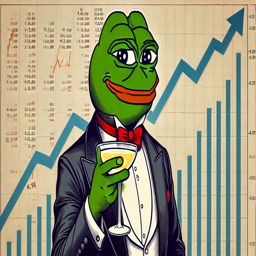

In [13]:
first_img

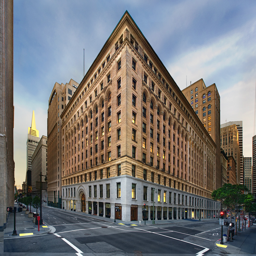

In [14]:
second_img

Convolutions have some interesting usages in image processing. For example, you can extract edges from an image by applying a convolution with a kernel that detects edges. Or you can convolve a specific kernel with your image to make it grayscale or blurred! Look at the definitions below:

__Edge Detection Kernel__:

_Sobel_ is one of the most famous edge detection kernels. It has two kernels, one for detecting vertical edges and the other for horizontal edges. You can see the kernels below:
$$
\text{Sobel}_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

$$
\text{Sobel}_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$


__Grayscale Kernel__:

You can simply convolve the image with the following kernel to make it grayscale:

$$
\text{Grayscale\_across\_R} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.3 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

$$
\text{Grayscale\_across\_G} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.6 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

$$
\text{Grayscale\_across\_B} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.1 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

(Convolve each kernel with its corresponding channel)

__Blurring Kernel__:

One of the famous kernels to blur an image is _Gaussian Blur_. You can see the kernel below:

$$
\text{Gaussian\_Blur} = \frac{1}{16} \times \begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$


In [15]:
img_size = 256

x = np.zeros((2, 3, img_size, img_size))
x[0] = np.array(first_img).transpose(2, 0, 1)
x[1] = np.array(second_img).transpose(2, 0, 1)

# a convolution weight, holding 4 filters 3x3
w = np.array([
    [  # Grayscale filter
        [[0, 0, 0],
         [0, 0.3, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0.6, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0.1, 0],
         [0, 0, 0]]
    ],
    [  # Sobel X
        [[-1, 0, 1],
         [-2, 0, 2],
         [-1, 0, 1]],
        [[-1, 0, 1],
         [-2, 0, 2],
         [-1, 0, 1]],
        [[-1, 0, 1],
         [-2, 0, 2],
         [-1, 0, 1]]
    ],
    [  # Sobel Y
        [[-1, -2, -1],
         [0, 0, 0],
         [1, 2, 1]],
        [[-1, -2, -1],
         [0, 0, 0],
         [1, 2, 1]],
        [[-1, -2, -1],
         [0, 0, 0],
         [1, 2, 1]]
    ],
    [  # Gaussian Blur
        [[1, 2, 1],
         [2, 4, 2],
         [1, 2, 1]],
        [[1, 2, 1],
         [2, 4, 2],
         [1, 2, 1]],
        [[1, 2, 1],
         [2, 4, 2],
         [1, 2, 1]]
    ]
]) / np.array([1, 1, 1, 16]).reshape(-1, 1, 1, 1)

b = np.array([0, 128, 128, 0])

conv = MyConv(stride=1, padding=1)
out = conv.forward(x, w, b)

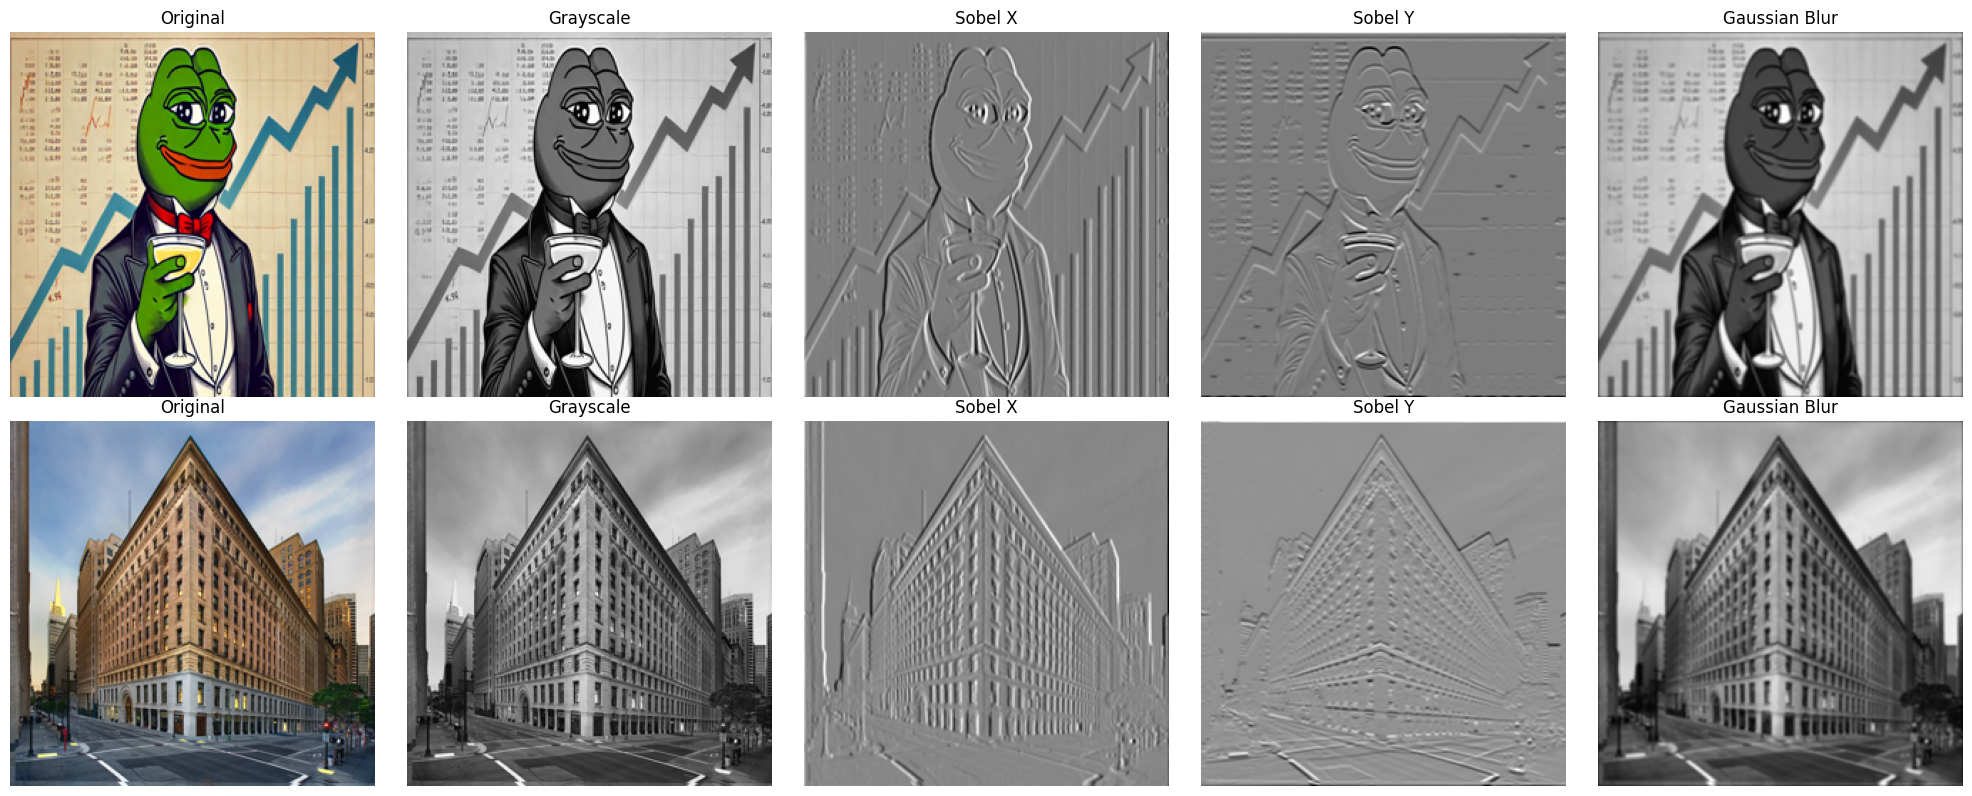

In [16]:
import matplotlib.pyplot as plt

#TODO: Plot the original image, grayscale, sobel x, sobel y, and gaussian blur of each image

filter_names = ['Grayscale', 'Sobel X', 'Sobel Y', 'Gaussian Blur']

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(2):  # For each image
    # Original image: transpose CHW to HWC and convert to uint8 for display
    img = x[i].transpose(1, 2, 0).astype('uint8')
    axs[i, 0].imshow(img)
    axs[i, 0].set_title('Original')
    axs[i, 0].axis('off')

    # Filtered images
    for j in range(4):
        axs[i, j + 1].imshow(out[i, j], cmap='gray')
        axs[i, j + 1].set_title(filter_names[j])
        axs[i, j + 1].axis('off')

plt.tight_layout()
plt.show()
